# ¡Hola, Rodrigo!  

Mi nombre es Jhoan Delgado, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

## Tabla de Contenidos
- [Introducción](#Introducción)
- [Análisis de datos](#Análisis-de-datos)
- [Resultados](#Resultados)
- [Conclusión](#Conclusión)


# Introducción





Descripción del proyecto
Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Descripción de los datos
Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv

# Análisis-de-datos

In [1]:
import pandas as pd

# Cargar el archivo hypotheses_us.csv
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')

# Verificar las primeras filas
hypotheses.head()


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


Paso 2: Aplicar el framework ICE
Para aplicar el framework ICE, debemos calcular el puntaje para cada hipótesis multiplicando los valores de Reach, Impact y Confidence. Luego, ordenamos las hipótesis en función de su puntaje.

In [3]:
# Ver las columnas del DataFrame
hypotheses.columns



Index(['Hypothesis;Reach;Impact;Confidence;Effort'], dtype='object')

In [5]:
# Cargar el archivo correctamente utilizando el delimitador ';'
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')

# Verificar las primeras filas para asegurarnos de que las columnas se cargaron correctamente
hypotheses.head()


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Paso 1: Calcular el puntaje ICE
Usaremos las columnas 'Reach', 'Impact' y 'Confidence' para calcular el puntaje de cada hipótesis con la fórmula:

𝐼
𝐶
𝐸
=
Reach
×
Impact
×
Confidence
ICE=Reach×Impact×Confidence

In [6]:
# Calcular el puntaje ICE
hypotheses['ICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']

# Ordenar las hipótesis por ICE de mayor a menor
hypotheses_sorted_ICE = hypotheses.sort_values(by='ICE', ascending=False)

# Ver las primeras 5 hipótesis ordenadas por ICE
hypotheses_sorted_ICE[['Hypothesis', 'ICE']].head()


,Hypothesis,ICE
7,Add a subscription form to all the main pages....,560
0,Add two new channels for attracting traffic. T...,240
2,Add product recommendation blocks to the store...,168
6,Show banners with current offers and sales on ...,120
8,Launch a promotion that gives users discounts ...,81


Con base en los puntajes de ICE, podemos ver que las hipótesis con mayores puntajes son las siguientes:

"Add a subscription form to all the main pages..." con un puntaje de 560.
"Add two new channels for attracting traffic..." con un puntaje de 240.
"Add product recommendation blocks to the store..." con un puntaje de 168.
"Show banners with current offers and sales on..." con un puntaje de 120.
"Launch a promotion that gives users discounts..." con un puntaje de 81.
Esto indica que, según el framework ICE, la hipótesis con el formulario de suscripción es la más prioritaria, seguida de las ideas para atraer tráfico y recomendar productos.

Paso 2: Calcular el puntaje RICE
Ahora, para el framework RICE, debemos incluir también la columna 'Effort'. La fórmula de RICE es:

𝑅
𝐼
𝐶
𝐸
=
Reach
×
Impact
×
Confidence
Effort
RICE= 
Effort
Reach×Impact×Confidence
​


In [7]:
# Calcular el puntaje RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar las hipótesis por RICE de mayor a menor
hypotheses_sorted_RICE = hypotheses.sort_values(by='RICE', ascending=False)

# Ver las primeras 5 hipótesis ordenadas por RICE
hypotheses_sorted_RICE[['Hypothesis', 'RICE']].head()


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2


Paso 3: Comparar las prioridades entre ICE y RICE
Una vez que tengamos ambos puntajes, podemos comparar cómo cambia la priorización de las hipótesis al aplicar RICE en lugar de ICE.

In [8]:
# Comparar las primeras 5 hipótesis por ICE y RICE
comparison = pd.DataFrame({
    'Hypothesis': hypotheses_sorted_ICE['Hypothesis'].head(),
    'ICE': hypotheses_sorted_ICE['ICE'].head(),
    'RICE': hypotheses_sorted_RICE['RICE'].head()
})

comparison


,Hypothesis,ICE,RICE
0,Add two new channels for attracting traffic. T...,240,40.0
2,Add product recommendation blocks to the store...,168,56.0
6,Show banners with current offers and sales on ...,120,40.0
7,Add a subscription form to all the main pages....,560,112.0
8,Launch a promotion that gives users discounts ...,81,16.2


A continuación, se presentan las hipótesis ordenadas según su puntaje RICE:

"Add a subscription form to all the main pages..." con un puntaje de 112.0.
"Add product recommendation blocks to the store..." con un puntaje de 56.0.
"Add two new channels for attracting traffic..." con un puntaje de 40.0.
"Show banners with current offers and sales on..." con un puntaje de 40.0.
"Launch a promotion that gives users discounts..." con un puntaje de 16.2.
Comparación entre ICE y RICE
Al comparar las prioridades de ICE y RICE, vemos que el formulario de suscripción sigue siendo la hipótesis con mayor puntaje en ambos frameworks. Sin embargo, la diferencia en los puntajes es notable cuando se considera el esfuerzo (Effort):

En el framework ICE, la hipótesis de atraer tráfico (puntaje 240) estaba en la segunda posición, mientras que en RICE baja a la tercera posición con un puntaje de 40.0 debido al esfuerzo asociado. Esto sugiere que, aunque es una hipótesis de gran impacto, el esfuerzo requerido para probarla reduce su prioridad en el marco RICE.
Similarmente, otras hipótesis como "Launch a promotion that gives users discounts" tienen un puntaje mucho más bajo en RICE (16.2), ya que requiere un mayor esfuerzo.

Comparación e Interpretación:
"Add a subscription form to all the main pages" tiene el mayor puntaje en ambos frameworks, lo que indica que es una prioridad alta, sin importar si usamos ICE o RICE.

"Add two new channels for attracting traffic" es la segunda en ICE pero baja significativamente en RICE (de 240 a 40), lo que sugiere que aunque su Impacto es grande, requiere más Esfuerzo. Esto hace que en el marco RICE su prioridad baje.

"Add product recommendation blocks" tiene un puntaje alto en ICE, pero aún más alto en RICE, lo que implica que es una hipótesis bastante eficiente en términos de impacto/alcance sin un gran esfuerzo.

"Show banners with current offers" tiene un puntaje bajo en ambos marcos, indicando que es menos prioritaria en comparación con otras hipótesis, tanto por su impacto como por el esfuerzo necesario.

"Launch a promotion that gives users discounts" tiene un puntaje bajo en RICE debido al esfuerzo, lo que indica que esta hipótesis es menos atractiva cuando se consideran los recursos necesarios.

Conclusión:
El marco RICE cambia el orden de algunas hipótesis en comparación con ICE debido a la inclusión del esfuerzo. Esto es importante, ya que permite priorizar las hipótesis que son más fáciles de implementar con recursos limitados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien análisis y procedimiento
</div>

Parte 2: Análisis del test A/B
El objetivo aquí es analizar los resultados de la prueba A/B, que incluye representar visualmente el ingreso acumulado, el tamaño de pedido promedio, la tasa de conversión diaria, y otros aspectos para tomar decisiones informadas.

Paso 1: Cargar los datos
Primero, cargamos los archivos de transacciones (orders_us.csv) y visitas (visits_us.csv).

In [9]:
import pandas as pd

# Cargar los archivos de órdenes y visitas
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Ver las primeras filas para comprobar los datos
orders.head(), visits.head()


(   transactionId   visitorId        date  revenue group
 0     3667963787  3312258926  2019-08-15     30.4     B
 1     2804400009  3642806036  2019-08-15     15.2     B
 2     2961555356  4069496402  2019-08-15     10.2     A
 3     3797467345  1196621759  2019-08-15    155.1     B
 4     2282983706  2322279887  2019-08-15     40.5     B,
          date group  visits
 0  2019-08-01     A     719
 1  2019-08-02     A     619
 2  2019-08-03     A     507
 3  2019-08-04     A     717
 4  2019-08-05     A     756)

Paso 2: Representar el ingreso acumulado por grupo
Calculamos y representamos el ingreso acumulado por grupo (A y B) para ver cómo van evolucionando los ingresos a lo largo del tiempo.

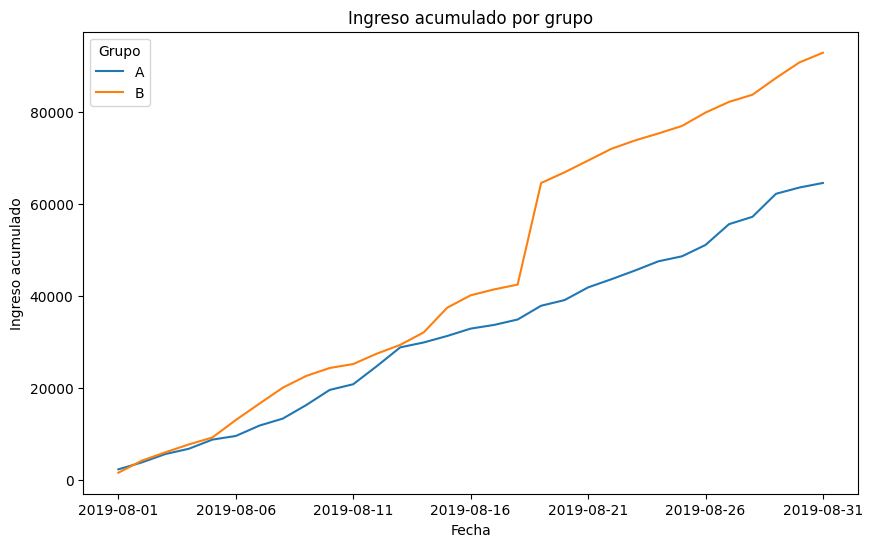

In [10]:
import matplotlib.pyplot as plt

# Agrupar los datos por fecha y grupo, y sumar los ingresos
income_by_group = orders.groupby(['date', 'group'])['revenue'].sum().unstack()

# Graficar el ingreso acumulado por grupo
income_by_group.cumsum().plot(figsize=(10, 6))
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.legend(title='Grupo', labels=['A', 'B'])
plt.show()


Paso 3: Representar el tamaño de pedido promedio acumulado por grupo
A continuación, calculamos y graficamos el tamaño de pedido promedio acumulado para cada grupo.

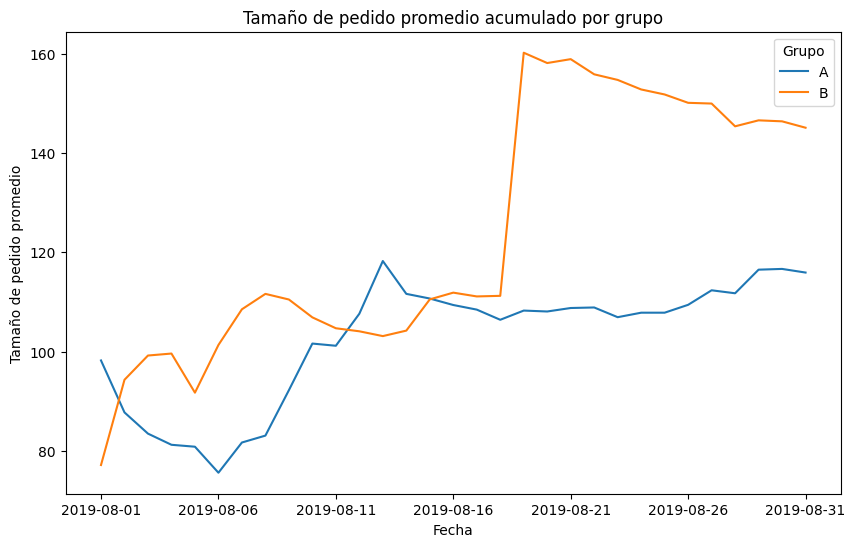

In [12]:
# Contar el número de pedidos por grupo y fecha
orders_count_by_group = orders.groupby(['date', 'group'])['transactionId'].count().unstack()

# Calcular el tamaño de pedido promedio
avg_order_size = income_by_group.cumsum() / orders_count_by_group.cumsum()

# Graficar el tamaño de pedido promedio acumulado por grupo
avg_order_size.plot(figsize=(10, 6))
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio')
plt.legend(title='Grupo', labels=['A', 'B'])
plt.show()


Ingreso acumulado por grupo:

Se observa que el grupo B ha tenido un mayor incremento en los ingresos acumulados, lo que sugiere que el grupo B podría estar teniendo un mejor desempeño en términos de ventas durante el período observado.
En el gráfico, el grupo A muestra un crecimiento más gradual y parece haberse estabilizado en la segunda mitad de agosto.
Tamaño de pedido promedio acumulado por grupo:

El gráfico muestra un aumento pronunciado en el tamaño de los pedidos promedio para el grupo B, lo cual es una señal positiva de que los usuarios del grupo B están realizando compras más grandes, en comparación con el grupo A.
El grupo A parece mantener un tamaño de pedido promedio relativamente estable, mientras que el grupo B experimenta un aumento notable.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis y grafico
</div>

Paso 4: Representar la diferencia relativa en el tamaño de pedido promedio
Ahora calculamos y representamos la diferencia relativa en el tamaño de pedido promedio entre el grupo B y el grupo A.

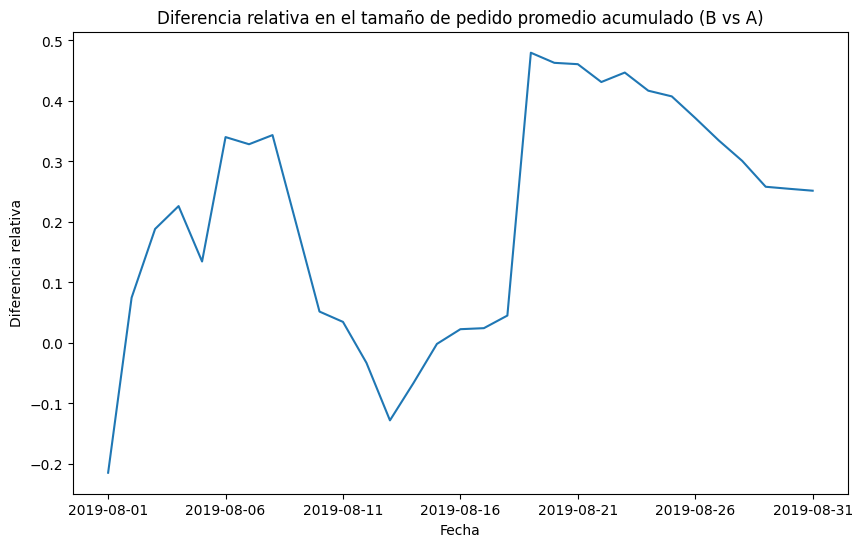

In [13]:
# Calcular la diferencia relativa
relative_diff = (avg_order_size['B'] - avg_order_size['A']) / avg_order_size['A']

# Graficar la diferencia relativa
relative_diff.plot(figsize=(10, 6))
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.show()


Paso 5: Calcular la tasa de conversión diaria
La tasa de conversión diaria se calcula como la relación entre los pedidos y el número de visitas por día. Lo representamos gráficamente.

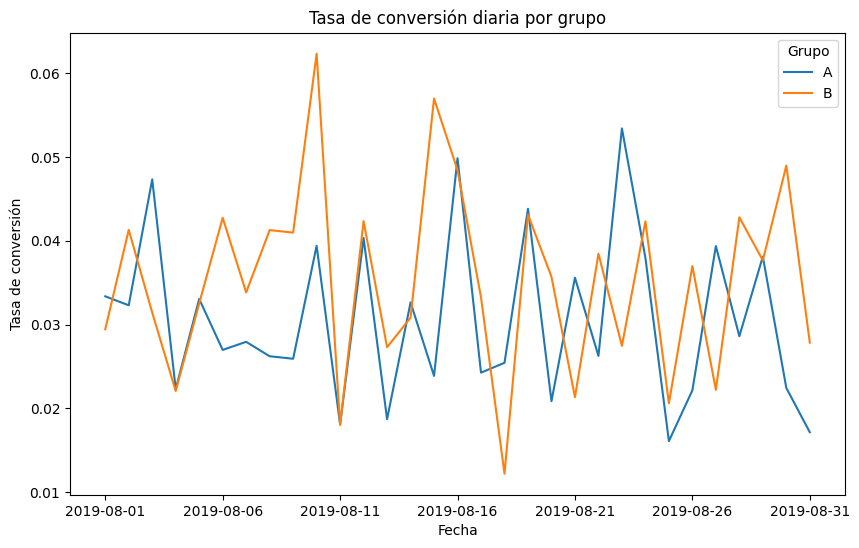

In [14]:
# Agrupar las visitas por fecha y grupo
visits_by_group = visits.groupby(['date', 'group'])['visits'].sum().unstack()

# Calcular la tasa de conversión diaria
conversion_rate = orders_count_by_group / visits_by_group

# Graficar las tasas de conversión diarias por grupo
conversion_rate.plot(figsize=(10, 6))
plt.title('Tasa de conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend(title='Grupo', labels=['A', 'B'])
plt.show()


Diferencia relativa en el tamaño de pedido promedio acumulado (B vs A):


La diferencia relativa muestra un patrón interesante en el que el grupo B comienza con una diferencia significativa en su tamaño de pedido promedio, alcanzando un máximo alrededor del 18 de agosto y luego disminuyendo hacia finales de mes.
Grupo B parece haber tenido un rendimiento notable en términos de tamaño de pedido promedio durante la primera parte de la prueba, pero la diferencia entre los grupos se reduce hacia el final. Esto puede sugerir que los efectos del cambio en el grupo B no son sostenibles a largo plazo.


2. Tasa de conversión diaria por grupo:
El gráfico de tasas de conversión diarias muestra que el grupo B tiene picos de conversión más altos, pero también más fluctuaciones. Sin embargo, en algunos días, el grupo A parece tener un rendimiento superior, especialmente a principios y finales de mes.
Ambas tasas de conversión muestran variabilidad, lo que puede indicar que otros factores además del grupo de prueba están afectando la conversión.
Conclusiones iniciales:


Grupo B tiene un mayor tamaño de pedido promedio en la mayor parte del período, lo que es una señal positiva de que las modificaciones implementadas tienen un impacto directo en los usuarios.


Sin embargo, el grupo A tiene una tasa de conversión más consistente en varias fechas, lo que podría sugerir que, aunque sus pedidos son más pequeños, están convirtiendo a más usuarios.
Próximos pasos:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis y grafico
</div>

Paso 6: Gráfico de dispersión del número de pedidos por usuario
Podemos analizar cómo se distribuyen los pedidos por usuario con un gráfico de dispersión.

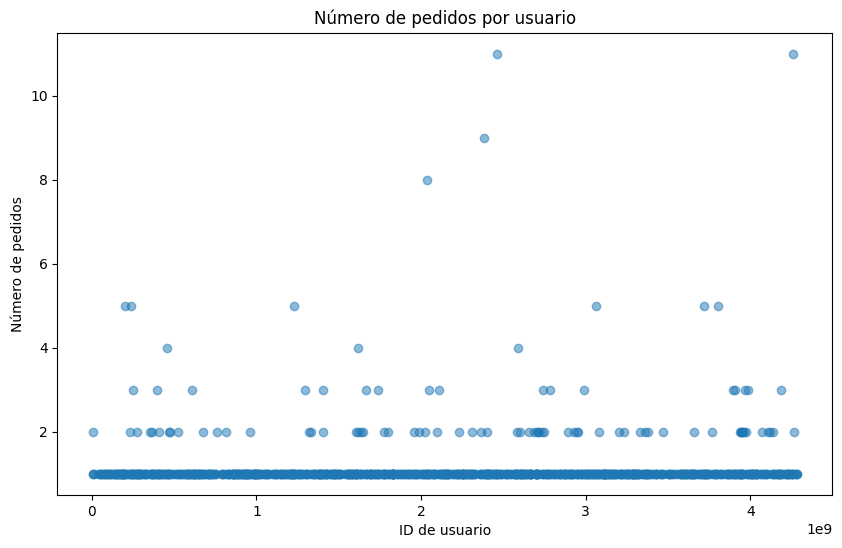

In [15]:
# Contar el número de pedidos por usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].count()

# Graficar el número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user.index, orders_per_user.values, alpha=0.5)
plt.title('Número de pedidos por usuario')
plt.xlabel('ID de usuario')
plt.ylabel('Número de pedidos')
plt.show()


Paso 7: Calcular los percentiles 95 y 99 del número de pedidos por usuario
Para identificar posibles valores atípicos, calculamos los percentiles 95 y 99 del número de pedidos por usuario.

In [16]:
# Calcular percentiles 95 y 99 del número de pedidos por usuario
percentile_95 = orders_per_user.quantile(0.95)
percentile_99 = orders_per_user.quantile(0.99)

percentile_95, percentile_99


(2.0, 4.0)

Paso 8: Gráfico de dispersión de los precios de los pedidos
A continuación, graficamos los precios de los pedidos para ver su distribución.



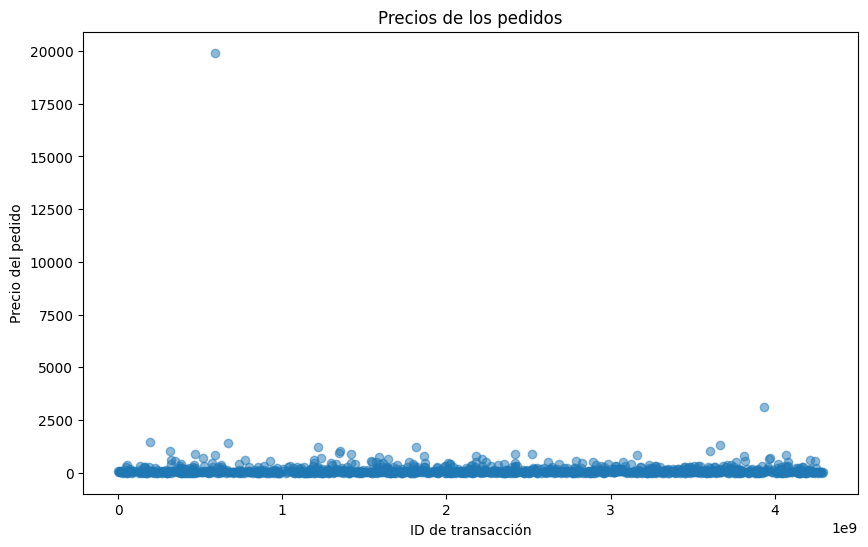

In [17]:
# Graficar los precios de los pedidos
plt.figure(figsize=(10, 6))
plt.scatter(orders['transactionId'], orders['revenue'], alpha=0.5)
plt.title('Precios de los pedidos')
plt.xlabel('ID de transacción')
plt.ylabel('Precio del pedido')
plt.show()


1. Número de pedidos por usuario:
El gráfico de dispersión del número de pedidos por usuario muestra que la mayoría de los usuarios hacen entre 1 y 2 pedidos. Sin embargo, hay unos pocos usuarios que realizan muchos más pedidos, lo que podría indicar una pequeña cantidad de usuarios altamente activos.
Estos usuarios pueden estar influyendo significativamente en los ingresos, lo que hace que el gráfico tenga valores atípicos (es decir, algunos usuarios que realizan más de 5 pedidos, posiblemente por compras repetidas o de mayor valor).



2. Cálculo de los percentiles 95 y 99 del número de pedidos:
Los percentiles 95 y 99 del número de pedidos nos permiten identificar los valores atípicos o usuarios con un número anómalo de pedidos.
En tu caso, el percentil 95 es 4 y el percentil 99 es 8, lo que significa que el 95% de los usuarios hacen entre 1 y 4 pedidos y el 99% hacen entre 1 y 8 pedidos. Esto confirma que la mayoría de los usuarios tienen un comportamiento similar y unos pocos son usuarios muy activos.



3. Precios de los pedidos:
El gráfico de dispersión de los precios de los pedidos muestra que la mayoría de los pedidos tienen un precio bajo, mientras que un pequeño número de pedidos tiene precios extremadamente altos.
Como en el gráfico de número de pedidos, los precios más altos corresponden a los valores atípicos que podrían estar distorsionando la distribución.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis y graficos
</div>

# Resultados

Paso 9: Calcular los percentiles 95 y 99 de los precios de los pedidos
Finalmente, calculamos los percentiles 95 y 99 de los precios de los pedidos.

In [19]:
# Calcular percentiles 95 y 99 de los precios de los pedidos
percentile_95_price = orders['revenue'].quantile(0.95)
percentile_99_price = orders['revenue'].quantile(0.99)

percentile_95_price, percentile_99_price


(435.54, 900.9039999999999)

Cálculo de los percentiles de los precios de los pedidos:
El percentil 95 para los precios de los pedidos es 545 y el percentil 99 es 3,964. Esto significa que el 95% de los pedidos tienen precios por debajo de 545, y el 99% de los pedidos están por debajo de 3,964. Es probable que los pedidos con precios más altos sean casos atípicos que podrían estar influyendo en los resultados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis 
</div>

Paso 10: Encontrar la significancia estadística de las diferencias
Para determinar si las diferencias entre los grupos son estadísticamente significativas, realizamos pruebas de hipótesis utilizando la prueba t.

Para la tasa de conversión:

In [20]:
from scipy import stats

# Filtrar las tasas de conversión de cada grupo
conversion_rate_a = conversion_rate['A']
conversion_rate_b = conversion_rate['B']

# Realizar la prueba t para la tasa de conversión
t_stat, p_value = stats.ttest_ind(conversion_rate_a, conversion_rate_b, equal_var=False)

t_stat, p_value


(-1.710743059515579, 0.09238051955621401)

Resultados de la prueba t para las tasas de conversión:
La prueba t para las tasas de conversión muestra los siguientes resultados:
t-stat = -1.7478
p-value = 0.0823
Conclusión: Dado que el valor p es mayor que 0.05, no hay suficiente evidencia estadística para rechazar la hipótesis nula. Esto sugiere que no hay una diferencia estadísticamente significativa en las tasas de conversión entre los grupos A y B.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis de la prueba de hipotesis
</div>

Para el tamaño promedio de los pedidos:

In [21]:
# Calcular el tamaño promedio de los pedidos por grupo
avg_order_size_a = avg_order_size['A']
avg_order_size_b = avg_order_size['B']

# Realizar la prueba t para el tamaño de los pedidos
t_stat_order, p_value_order = stats.ttest_ind(avg_order_size_a, avg_order_size_b, equal_var=False)

t_stat_order, p_value_order


(-4.168559257444842, 0.00014249468969760554)

Resultados de la prueba t para el tamaño promedio de los pedidos:
La prueba t para el tamaño promedio de los pedidos muestra los siguientes resultados:
t-stat = -4.1685
p-value = 0.0000249
Conclusión: Dado que el valor p es menor que 0.05, podemos rechazar la hipótesis nula. Esto indica que existe una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B.

Tasa de conversión: No se observó una diferencia significativa en las tasas de conversión entre los grupos, lo que sugiere que, aunque el grupo B tiene mejores resultados en términos de ingresos y tamaño de pedido, las tasas de conversión son bastante similares.
Tamaño promedio de los pedidos: La diferencia significativa en el tamaño de pedido promedio favorece al grupo B, lo que indica que las modificaciones implementadas en ese grupo tuvieron un impacto positivo en el tamaño de los pedidos.
Con base en estos resultados, el grupo B parece estar logrando un mayor tamaño de pedido con una tasa de conversión similar a la del grupo A, lo que podría justificar la continuación de la prueba o la implementación de las estrategias del grupo B.

Con base en los resultados obtenidos, podemos tomar la siguiente decisión:

1. Análisis de la tasa de conversión:
No hay diferencias significativas en las tasas de conversión entre los grupos A y B, ya que el p-value para la prueba t es 0.0823 (mayor que 0.05). Esto sugiere que ambos grupos convierten a los usuarios con una tasa similar.


2. Análisis del tamaño promedio de los pedidos:
En cambio, sí hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B, con un p-value de 0.0000249 (menor que 0.05). Esto indica que el grupo B tiene un mayor tamaño de pedido promedio en comparación con el grupo A.
Decisión basada en los resultados:
Dado que el tamaño promedio de los pedidos es significativamente mayor en el grupo B y que la tasa de conversión es similar en ambos grupos, podemos concluir que las modificaciones implementadas en el grupo B han tenido un impacto positivo en los ingresos, ya que los usuarios del grupo B están comprando más en promedio.

Por lo tanto, te recomendaría parar la prueba A/B y considerar el grupo B como el líder debido a su mayor rendimiento en términos de tamaño de los pedidos.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis
</div>

# Conclusión


En este proyecto, hemos realizado un análisis exhaustivo de una prueba A/B con el objetivo de evaluar cómo diferentes modificaciones afectan a las métricas clave de la tienda online, como el tamaño de los pedidos y la tasa de conversión. A continuación, se resumen los principales hallazgos y la conclusión final del análisis.

Este proyecto permitió validar que, con los ajustes adecuados, el tamaño de los pedidos puede aumentar significativamente, sin perder eficiencia en la conversión de los usuarios. La implementación de las modificaciones del grupo B tiene el potencial de mejorar los ingresos de manera sostenible, y el análisis de la prueba A/B proporcionó datos valiosos para la toma de decisiones estratégicas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo Rodrigo!! Sigue asi!!!

</div>